In [36]:
 pip install django

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from django.db import models

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [39]:
x_train.shape

(50000, 32, 32, 3)

In [40]:
x_test.shape

(10000, 32, 32, 3)

In [41]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

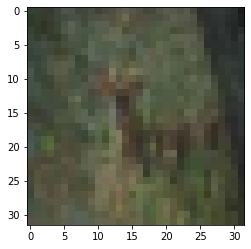

In [42]:
plt.imshow(x_train[10])

In [43]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [61]:
x_train_=x_train/255
x_test=x_test/255

In [62]:
y_train_categorical=keras.utils.to_categorical(
    y_train, num_classes=10,dtype= 'float32'
)

In [46]:
y_train_categorical.shape

(50000, 10)

In [47]:
# ANN performed really bad and took a lot time to compute
model_ann= keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
  22/1563 [..............................] - ETA: 2:09 - loss: 126.6170 - accuracy: 0.3807

KeyboardInterrupt: ignored

In [54]:
 model_cnn=keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
   keras. layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [56]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model_cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6297 - accuracy: 0.4068
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3372 - accuracy: 0.5287
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1641 - accuracy: 0.5948
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0465 - accuracy: 0.6377
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9667 - accuracy: 0.6667
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8904 - accuracy: 0.6923
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8320 - accuracy: 0.7124
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7777 - accuracy: 0.7305
Epoch 9/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7299 - accuracy: 0.7468
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [67]:
y_pred = model_cnn.predict(x_test)
y_pred[:5]

array([[0.03378432, 0.02014825, 0.18185155, 0.13451505, 0.3382204 ,
        0.05244036, 0.14595327, 0.03213985, 0.03642088, 0.02452614],
       [0.0320628 , 0.02235371, 0.16164878, 0.15585826, 0.32890567,
        0.0607232 , 0.14299347, 0.03272494, 0.03550945, 0.02721979],
       [0.03282792, 0.02067866, 0.17616111, 0.13695872, 0.34221497,
        0.0545112 , 0.14246345, 0.03245559, 0.03652755, 0.02520091],
       [0.03253267, 0.02029036, 0.17372435, 0.13577029, 0.3466634 ,
        0.05486671, 0.1434297 , 0.03336886, 0.03448133, 0.02487234],
       [0.03471359, 0.01989124, 0.17965773, 0.13750423, 0.33423236,
        0.05264737, 0.14544511, 0.03216126, 0.04027196, 0.02347515]],
      dtype=float32)

In [68]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [71]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[4, 4, 4, 4, 4]

In [72]:
classes[y_classes[3]]

'deer'

TypeError: ignored

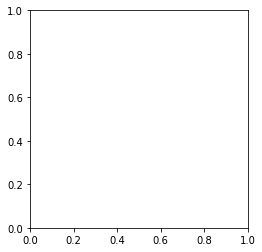